In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import csv

from matplotlib.offsetbox import AnchoredText

matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams['savefig.dpi'] = 200

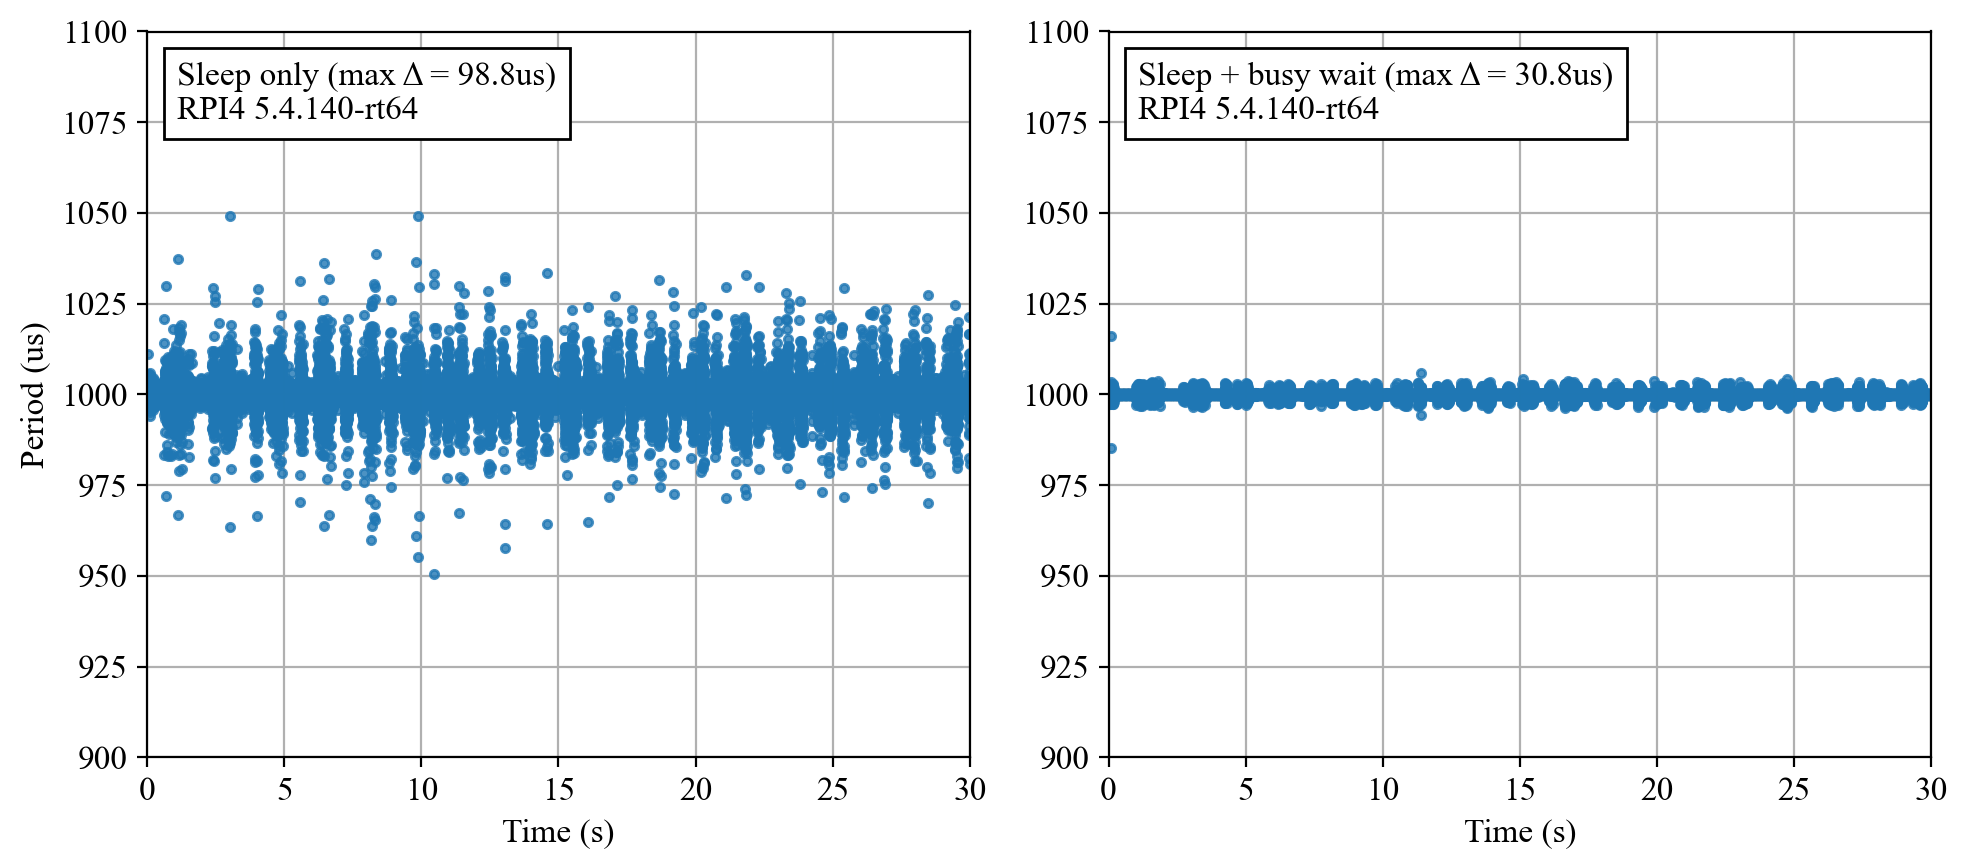

In [2]:
def load(filename):
  data = []

  with open(filename) as f:
    reader = csv.reader(f)
    for line in reader:
      line = [float(v.strip()) for v in line]
      data.append(line)

  return np.array(data)

sleep_and_busy_wait = load("sleep_and_busy_wait.csv")
sleep = load("sleep.csv")

fig = plt.figure(figsize=[10, 4.5])

ax = fig.add_subplot(1, 2, 1)
time_diff = np.diff(sleep[:, 0])
l2, = ax.plot(sleep[:-1, 0] / 1_000_000, time_diff, ".", label="Sleep only", alpha=0.8)

max_delta = np.max(time_diff) - np.min(time_diff)
at = AnchoredText("Sleep only (max Δ = {:.1f}us)\nRPI4 5.4.140-rt64".format(max_delta), loc='upper left')
ax.add_artist(at)

ax.set_xlim(0, 30)
ax.set_ylim(900, 1100)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Period (us)")
ax.grid()


ax = fig.add_subplot(1, 2, 2)
time_diff = np.diff(sleep_and_busy_wait[:, 0])
l1, = ax.plot(sleep_and_busy_wait[:-1, 0] / 1_000_000, time_diff, ".", label="Sleep + busy wait", alpha=0.8)

max_delta = np.max(time_diff) - np.min(time_diff)
at = AnchoredText("Sleep + busy wait (max Δ = {:.1f}us)\nRPI4 5.4.140-rt64".format(max_delta), loc='upper left')
ax.add_artist(at)

ax.set_xlim(0, 30)
ax.set_ylim(900, 1100)
ax.set_xlabel("Time (s)")
ax.grid()

fig.tight_layout()
